# Seed Spacing Project

The goal of this project is to figure out the distance between 2 seeds from a video feed provided with gps data

In [1]:
from utils.filehandling import LoadFilesWithExtensions
import pandas as pd
import os
import torch
import torchvision
import numpy as np
from seed_distance_estimator import *


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
# Loading Trained CNN Model, CSV File Containing GPS information and the path of video file

model_path = "retina_fp_50.pth"
retina_net = RetinaNetSeedPredictor("Retina Net 18", model_path, device)
video_file = "exp2/video_data/6-28-2021_4-04-37 PM.avi"
csv_file = "exp2/gps_frame/1inch_4mph.csv"
csv_data_frame = pd.read_csv(csv_file)
csv_data_frame.head()

FileNotFoundError: [Errno 2] No such file or directory: 'exp2/gps_frame/1inch_4mph.csv'

In [12]:
spc = SeedSpacingCalculator(video_file_path=video_file, csv_data_frame=csv_data_frame, Model=retina_net, x_factor=0.13335)
spc.seek(0.2)
#spc.seek_frame(830)
distances = spc.getSpacing(max_count=None, threshold=0.5, reset=False)

0


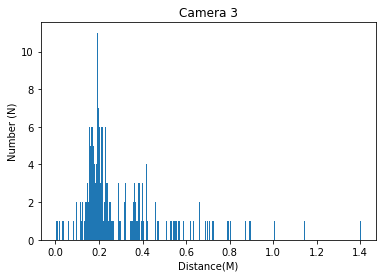

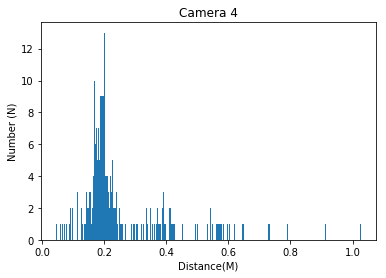

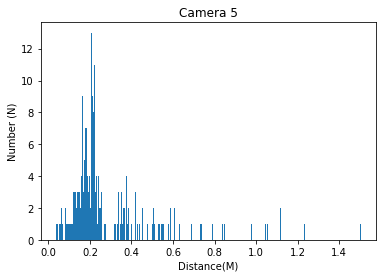

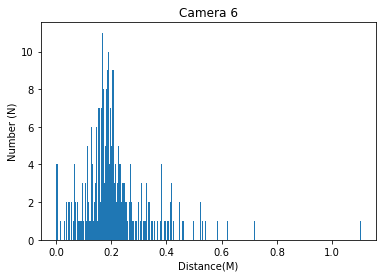

In [13]:
# Histograms

import matplotlib.pyplot as plot 
%matplotlib inline

n_bins = 300
for i in range(4):
    plot.hist([seed_attribute.distance for seed_attribute in distances[i].seed_attributes], bins=n_bins)
    plot.title('Camera {}'.format(i+3))
    plot.xlabel("Distance(M)")
    plot.ylabel("Number (N)")
    plot.savefig("Hist_{}.png".format(i))
    plot.show()